In [109]:
import pandas as pd

In [110]:
url = 'https://datosabiertos.enacom.gob.ar/rest/datastreams/289606/data.csv'
df_portabilidad_num_tel_mov = pd.read_csv(url,encoding='UTF-8',quotechar='"', sep=',', thousands=',')

In [111]:
df_portabilidad_num_tel_mov.head()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Periodo
0,2012,3,-17,19,0.0,-2,NaN,Mar-12
1,2012,4,3508,-1134,-189.0,-2185,NaN,Apr-12
2,2012,5,1253,4792,-853.0,-5192,NaN,May-12
3,2012,6,3263,-1248,-848.0,-1167,NaN,Jun-12
4,2012,7,5554,-3847,-1105.0,-602,NaN,Jul-12


In [112]:
df_portabilidad_num_tel_mov.isnull().sum()

Año           0
Mes           0
Personal      0
Claro         0
Nextel       58
Movistar      0
Otros       120
Periodo       0
dtype: int64

In [113]:
df_portabilidad_num_tel_mov = df_portabilidad_num_tel_mov.fillna(0)

In [114]:
df_portabilidad_num_tel_mov.drop_duplicates()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Periodo
0,2012,3,-17,19,0.0,-2,0.0,Mar-12
1,2012,4,3508,-1134,-189.0,-2185,0.0,Apr-12
2,2012,5,1253,4792,-853.0,-5192,0.0,May-12
3,2012,6,3263,-1248,-848.0,-1167,0.0,Jun-12
4,2012,7,5554,-3847,-1105.0,-602,0.0,Jul-12
...,...,...,...,...,...,...,...,...
123,2022,6,-3012,20311,0.0,-17348,49.0,Jun-22
124,2022,7,2263,7363,0.0,-9653,27.0,Jul-22
125,2022,8,996,19548,0.0,-20585,41.0,Aug-22
126,2022,9,-2209,18050,0.0,-15982,141.0,Sep-22


In [115]:
# Conversión de columnas a int64
df_portabilidad_num_tel_mov[['Año', 'Mes', 'Personal', 'Claro', 'Nextel', 'Movistar', 'Otros']] = df_portabilidad_num_tel_mov[
                                                                                                    ['Año', 'Mes', 'Personal', 'Claro', 'Nextel', 'Movistar', 'Otros']].astype('int64')

In [116]:
df_portabilidad_num_tel_mov.describe()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
count,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2017.000000,6.50000,1951.539062,4609.195312,-1114.257812,-5450.296875,3.820312
std,3.099403,3.40449,11088.648087,14646.975098,1272.612764,15141.533391,19.457781
min,2012.000000,1.00000,-18668.000000,-42345.000000,-4964.000000,-63567.000000,0.000000
25%,2014.000000,4.00000,-3427.250000,-1162.500000,-1895.250000,-13314.750000,0.000000
50%,2017.000000,6.50000,164.500000,4689.500000,-1058.000000,-5162.500000,0.000000
75%,2020.000000,9.00000,4877.500000,10935.000000,0.000000,-183.500000,0.000000
max,2022.000000,12.00000,41931.000000,38116.000000,0.000000,41453.000000,149.000000


In [117]:
df_portabilidad_num_tel_mov.describe(include= 'all')

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Periodo
count,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-12
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,2017.000000,6.50000,1951.539062,4609.195312,-1114.257812,-5450.296875,3.820312,NaN
std,3.099403,3.40449,11088.648087,14646.975098,1272.612764,15141.533391,19.457781,NaN
min,2012.000000,1.00000,-18668.000000,-42345.000000,-4964.000000,-63567.000000,0.000000,NaN
25%,2014.000000,4.00000,-3427.250000,-1162.500000,-1895.250000,-13314.750000,0.000000,NaN
50%,2017.000000,6.50000,164.500000,4689.500000,-1058.000000,-5162.500000,0.000000,NaN
75%,2020.000000,9.00000,4877.500000,10935.000000,0.000000,-183.500000,0.000000,NaN


In [118]:
# Renombrar la columna 'Año' a 'anio'
df_portabilidad_num_tel_mov.rename(columns={'Año': 'anio'}, inplace=True)

In [119]:
# Convertir todas las columnas a minúsculas utilizando rename() y lower()
df_portabilidad_num_tel_mov = df_portabilidad_num_tel_mov.rename(columns=str.lower)

In [120]:
# Mapear los valores del mes a los trimestres correspondientes
trimestre_map = {
    1: [1, 2, 3],
    2: [4, 5, 6],
    3: [7, 8, 9],
    4: [10, 11, 12]
}

# Función para asignar el trimestre según el valor del mes
def asignar_trimestre(mes):
    for trimestre, meses in trimestre_map.items():
        if mes in meses:
            return trimestre

# Aplicar la función a la columna 'mes' para obtener el trimestre correspondiente
df_portabilidad_num_tel_mov['trimestre'] = df_portabilidad_num_tel_mov['mes'].apply(asignar_trimestre)


In [121]:
df_portabilidad_num_tel_mov.head(5)

,anio,mes,personal,claro,nextel,movistar,otros,periodo,trimestre
0,2012,3,-17,19,0,-2,0,Mar-12,1
1,2012,4,3508,-1134,-189,-2185,0,Apr-12,2
2,2012,5,1253,4792,-853,-5192,0,May-12,2
3,2012,6,3263,-1248,-848,-1167,0,Jun-12,2
4,2012,7,5554,-3847,-1105,-602,0,Jul-12,3


In [122]:
df_portabilidad_num_tel_mov['anio_tri'] = df_portabilidad_num_tel_mov['anio'].astype(str) + df_portabilidad_num_tel_mov['trimestre'].astype(str)

In [123]:
# Situar la columna 'anio_tri' como la primera columna
df_portabilidad_num_tel_mov = df_portabilidad_num_tel_mov[['anio_tri'] + df_portabilidad_num_tel_mov.columns[:-1].tolist()]

In [124]:
df_portabilidad_num_tel_mov['anio_tri'].astype('Int64')

0      20121
1      20122
2      20122
3      20122
4      20123
       ...  
123    20222
124    20223
125    20223
126    20223
127    20224
Name: anio_tri, Length: 128, dtype: Int64

In [125]:
df_portabilidad_num_tel_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anio_tri   128 non-null    object
 1   anio       128 non-null    int64 
 2   mes        128 non-null    int64 
 3   personal   128 non-null    int64 
 4   claro      128 non-null    int64 
 5   nextel     128 non-null    int64 
 6   movistar   128 non-null    int64 
 7   otros      128 non-null    int64 
 8   periodo    128 non-null    object
 9   trimestre  128 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 10.1+ KB


In [126]:
import seaborn as sns

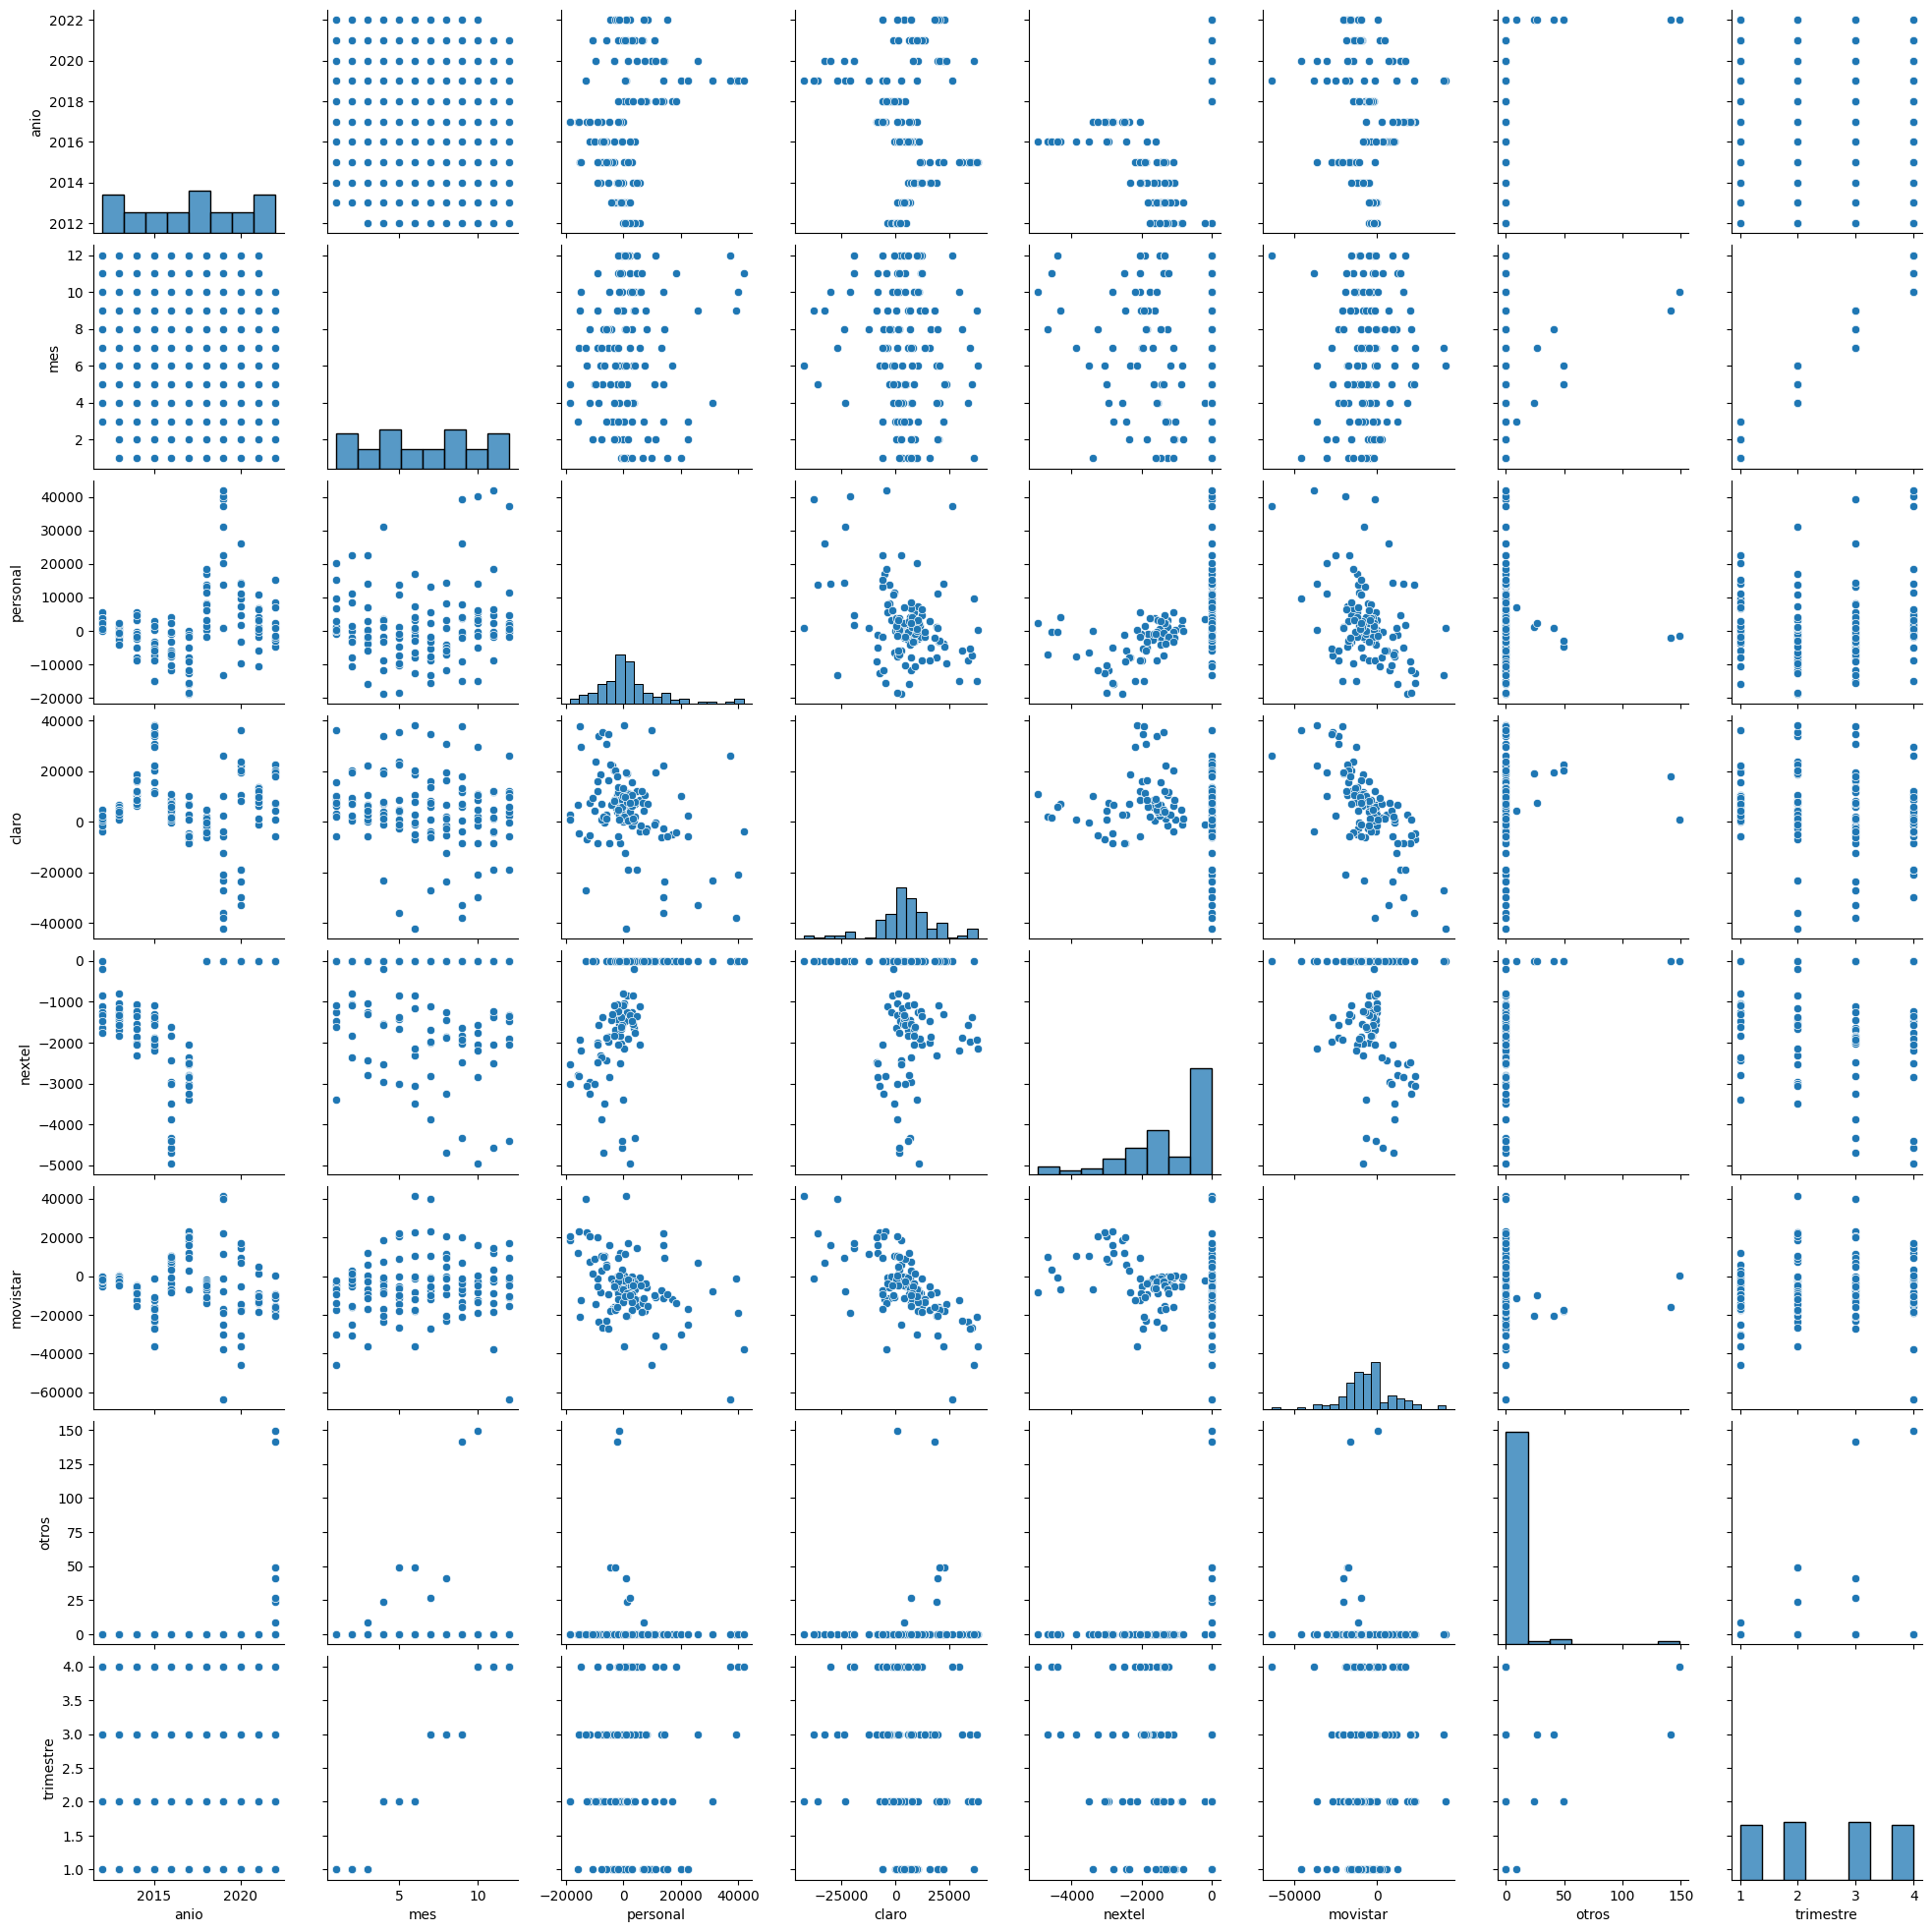

In [127]:
sns.pairplot(df_portabilidad_num_tel_mov)

In [128]:
# ordenar el DataFrame por año y trimestre
df_portabilidad_num_tel_mov = df_portabilidad_num_tel_mov.sort_values(by=["anio_tri"])

In [129]:
df_portabilidad_num_tel_mov.head(5)

,anio_tri,anio,mes,personal,claro,nextel,movistar,otros,periodo,trimestre
0,20121,2012,3,-17,19,0,-2,0,Mar-12,1
1,20122,2012,4,3508,-1134,-189,-2185,0,Apr-12,2
2,20122,2012,5,1253,4792,-853,-5192,0,May-12,2
3,20122,2012,6,3263,-1248,-848,-1167,0,Jun-12,2
4,20123,2012,7,5554,-3847,-1105,-602,0,Jul-12,3


# Guardo

In [130]:
df_portabilidad_num_tel_mov.to_csv('../CSV_Cleaned/df_portabilidad_num_tel_mov.csv', index=False, mode='w')